# Project 2: Zipf's Law distribution 2

Julia Castrén, Sara Lehto

### 1.

In [5]:
import pandas as pd
import os

In [6]:
directory = r'C:\Users\OMISTAJA\Downloads\Natural Language Processing and Text Mining 521158S-3005\Project\wikipedia-fi-2017-src'

In [7]:
data = []
#downloaded locally
#looping through files
for filename in os.listdir(directory):
    file_path = os.path.join(directory, filename)
    if os.path.isfile(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
            #store the content in a directory
            data.append({'filename': filename, 'page_content': content})

In [8]:
#creating a dataframe
df = pd.DataFrame(data)
print(df.head()) #print first rows

          filename                                       page_content
0       README.txt  Finnish Wikipedia 2017, source\nSuomenkielinen...
1   wiki_part0.VRT  <doc id="1" url="https://fi.wikipedia.org/wiki...
2   wiki_part1.VRT  <doc id="2954" url="https://fi.wikipedia.org/w...
3  wiki_part10.VRT  <doc id="61301" url="https://fi.wikipedia.org/...
4  wiki_part11.VRT  <doc id="70733" url="https://fi.wikipedia.org/...


In [9]:
import re

In [10]:
parsed_docs = []
for index, row in df.iterrows():
    page_content = row['page_content']
    docs = re.findall(r'<doc id="(\d+)" url="([^"]+)" title="([^"]+)">(.*?)</doc>', 
                      page_content, 
                      re.DOTALL)
    for doc_id, url, title, content in docs:
        tokens = []    
        #extract lines between <sentence> tags
        sentences = re.findall(r'<sentence>(.*?)</sentence>', content, re.DOTALL)
        
        for sentence in sentences:
            for line in sentence.splitlines():
                if line.strip():  #ignoring empty lines
                    parts = line.split('\t')
                    if len(parts) > 1:
                        tokens.append(parts[1]) #second column
                        
        parsed_docs.append({
            'id': doc_id,
            'url': url,
            'title': title,
            'tokens': tokens
        })
        
docs_df = pd.DataFrame(parsed_docs)

In [11]:
print(docs_df.head())

  id                                    url               title  \
0  1  https://fi.wikipedia.org/wiki?curid=1           Amsterdam   
1  2  https://fi.wikipedia.org/wiki?curid=2              Aikido   
2  4  https://fi.wikipedia.org/wiki?curid=4  Algebrallinen luku   
3  5  https://fi.wikipedia.org/wiki?curid=5            Alkuluku   
4  6  https://fi.wikipedia.org/wiki?curid=6                  Au   

                                              tokens  
0  [Amsterdam, Amsterdam, on, Alankomaiden, pääka...  
1  [Aikido, Aikido, (, suom., harmonian, tie, ), ...  
2  [Algebrallinen, luku, Algebrallinen, luku, tar...  
3  [Alkuluku, Alkuluku, on, lukua, 1, suurempi, l...  
4                 [Au, Au, tarkoittaa, seuraavia, :]  


In [12]:
print(docs_df.iloc[0]['tokens'])

['Amsterdam', 'Amsterdam', 'on', 'Alankomaiden', 'pääkaupunki', '.', 'Amsterdam', 'on', 'väkiluvultaan', 'Alankomaiden', 'suurin', 'kaupunki', ',', 'huhtikuun', 'alussa', '2006', 'siellä', 'asui', '743', '905', 'asukasta', 'eli', 'noin', 'joka', '20.', 'hollantilainen', 'asuu', 'Amsterdamissa', '.', 'Yhteensä', 'Amsterdamissa', 'ja', 'sitä', 'ympäröivällä', 'kaupunkialueella', 'asuu', 'noin', '1', '450', '000', 'ihmistä', 'eli', 'vajaa', 'kymmenesosa', 'Alankomaiden', 'asukkaista', '.', 'Amsterdam', 'sijaitsee', 'Amstelin', 'suistossa', 'IJsselmeerin', 'rannalla', 'Alankomaiden', 'Pohjois-Hollannin', 'provinssissa', '.', 'Vaikka', 'Amsterdam', 'on', 'Alankomaiden', 'perustuslain', 'mukaan', 'maan', 'pääkaupunki', ',', 'sijaitsevat', 'niin', 'kuningashuone', ',', 'hallitus', ',', 'parlamentti', 'kuin', 'korkein', 'oikeuskin', 'Haagissa', '.', 'Amsterdamin', 'paikalle', 'rakennettiin', 'ensimmäiset', 'puutalot', '1200-luvun', 'alkupuolella', '.', 'Kaupunki', 'linnoitettiin', 'suojaksi', 

### 2.

In [13]:
titles_set = set(docs_df['title'])

#function to count linked entities
def count_linked_entities(tokens, titles_set):
    linked_entities_count = sum(1 for token in tokens if token in titles_set)
    return linked_entities_count

In [14]:
docs_df['linked_entity_count'] = docs_df['tokens'].apply(count_linked_entities, titles_set=titles_set)
docs_df['token_count'] = docs_df['tokens'].apply(len)

#print the result
print(docs_df[['id', 'title', 'token_count', 'linked_entity_count']])

           id               title  token_count  linked_entity_count
0           1           Amsterdam         1236                   51
1           2              Aikido          879                   11
2           4  Algebrallinen luku          373                    3
3           5            Alkuluku          748                   36
4           6                  Au            5                    2
...       ...                 ...          ...                  ...
425501  61291             Koraali          106                    6
425502  61292    Räjähtävä lammas          233                   19
425503  61293              Valens          122                   14
425504  61298            Flipperi          435                   13
425505  61300            Feissaus          279                   14

[425506 rows x 4 columns]


In [15]:
print(docs_df[['id', 'title', 'tokens', 'token_count', 'linked_entity_count']])

           id               title  \
0           1           Amsterdam   
1           2              Aikido   
2           4  Algebrallinen luku   
3           5            Alkuluku   
4           6                  Au   
...       ...                 ...   
425501  61291             Koraali   
425502  61292    Räjähtävä lammas   
425503  61293              Valens   
425504  61298            Flipperi   
425505  61300            Feissaus   

                                                   tokens  token_count  \
0       [Amsterdam, Amsterdam, on, Alankomaiden, pääka...         1236   
1       [Aikido, Aikido, (, suom., harmonian, tie, ), ...          879   
2       [Algebrallinen, luku, Algebrallinen, luku, tar...          373   
3       [Alkuluku, Alkuluku, on, lukua, 1, suurempi, l...          748   
4                      [Au, Au, tarkoittaa, seuraavia, :]            5   
...                                                   ...          ...   
425501  [Koraali, Koraali, on, luteri

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zipf, linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import norm

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [17]:
min_tokens = docs_df['token_count'].min()
max_tokens = docs_df['token_count'].max()

In [18]:
print(f'Min tokens: {min_tokens}')

Min tokens: 1


In [19]:
print(f'Max tokens: {max_tokens}')

Max tokens: 32864


### 3.

In [29]:
#creating 10 bins and assigning each document's token count to them
bins = np.linspace(min_tokens, max_tokens, num=11, dtype=int)

docs_df['token_bins'] = pd.cut(docs_df['token_count'], bins=bins)

In [30]:
#counting number or documents in each bin and calculating the centers of bins
bin_counts = docs_df['token_bins'].value_counts(sort=False)
bin_centers = [(bin_.left + bin_.right) / 2 for bin_ in bin_counts.index]

In [22]:
print(bin_counts)

(1, 3287]         424195
(3287, 6573]         971
(6573, 9859]         106
(9859, 13146]         22
(13146, 16432]         5
(16432, 19718]         0
(19718, 23005]         3
(23005, 26291]         2
(26291, 29577]         0
(29577, 32864]         1
Name: token_bins, dtype: int64


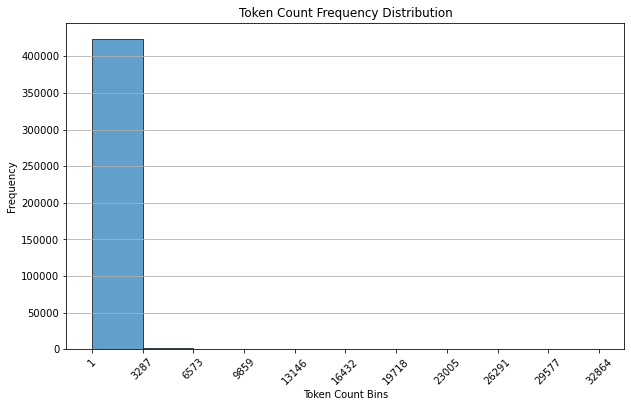

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(bin_centers, bin_counts, width=np.diff(bins), edgecolor='black', alpha=0.7)
plt.xlabel('Token Count Bins')
plt.ylabel('Frequency')
plt.title('Token Count Frequency Distribution')
plt.xticks(bins, [f'{int(b)}' for b in bins], rotation=45)
plt.grid(axis='y')
plt.show()

In [24]:
#ranking bins based on frequency
ranked_frequencies = np.sort(bin_counts.values)[::-1]
ranks = np.arange(1, len(ranked_frequencies) + 1)

In [25]:
rank = np.arange(1, len(bin_counts) + 1)
frequency = np.sort(bin_counts.values)[::-1]

In [26]:
non_zero_indices = frequency > 0   #erasing bins with zeros
#taking the logarithm of the ranks and frequencies
log_rank = np.log(rank[non_zero_indices])
log_frequency = np.log(frequency[non_zero_indices])

In [27]:
#fitting linear regression model
model = LinearRegression()
model.fit(log_rank.reshape(-1, 1), log_frequency)
predictions = model.predict(log_rank.reshape(-1, 1))

NameError: name 'LinearRegression' is not defined

In [28]:
#calculating residuals and standard deviation of the residuals
residuals = log_frequency - predictions
std_dev = np.std(residuals)

NameError: name 'predictions' is not defined

In [28]:
#calculating the 90% onfidence level bounds
confidence_level = 1.645 #z-score for 90% confidence interval
upper_bound = predictions + confidence_level * std_dev
lower_bound = predictions - confidence_level * std_dev

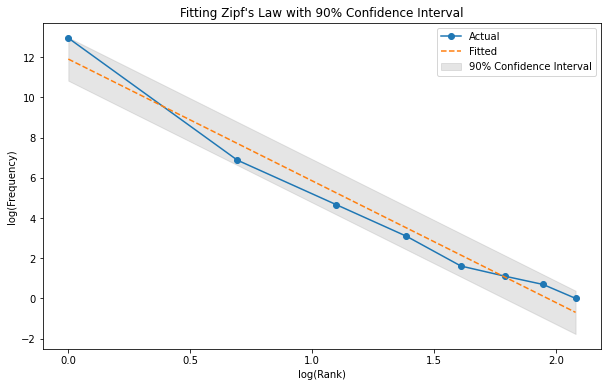

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(log_rank, log_frequency, label="Actual", marker='o')
plt.plot(log_rank, predictions, label="Fitted", linestyle='--')
plt.fill_between(log_rank, lower_bound, upper_bound, color='gray', alpha=0.2, label='90% Confidence Interval')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title("Fitting Zipf's Law with 90% Confidence Interval")
plt.legend()
plt.show()

In [30]:
#calculating R-squared and adjusted R-squared
n = len(log_frequency)
p = 1

r2 = r2_score(log_frequency, predictions)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')

R-squared: 0.9738
Adjusted R-squared: 0.9695


### 4.

In [31]:
#creating 20 bins and assigning each document's token count to them
bins2 = np.linspace(min_tokens, max_tokens, num=21, dtype=int)
docs_df['token_bins2'] = pd.cut(docs_df['token_count'], bins=bins2)
#counting number or documents in each bin and calculating the centers of bins
bin_counts2 = docs_df['token_bins2'].value_counts(sort=False)
bin_centers2 = [(bin_.left + bin_.right) / 2 for bin_ in bin_counts2.index]

In [32]:
print(bin_counts2)

(1, 1644]         420885
(1644, 3287]        3310
(3287, 4930]         749
(4930, 6573]         222
(6573, 8216]          77
(8216, 9859]          29
(9859, 11503]          9
(11503, 13146]        13
(13146, 14789]         3
(14789, 16432]         2
(16432, 18075]         0
(18075, 19718]         0
(19718, 21361]         2
(21361, 23005]         1
(23005, 24648]         1
(24648, 26291]         1
(26291, 27934]         0
(27934, 29577]         0
(29577, 31220]         0
(31220, 32864]         1
Name: token_bins2, dtype: int64


In [33]:
#ranking bins based on frequency
ranked_frequencies2 = np.sort(bin_counts2.values)[::-1]
ranks2 = np.arange(1, len(ranked_frequencies2) + 1)
rank2 = np.arange(1, len(bin_counts2) + 1)
frequency2 = np.sort(bin_counts2.values)[::-1]

In [34]:
non_zero_indices = frequency2 > 0   #Some bins have 0 frequency, 
#taking the logarithm of the ranks and frequencies
log_rank2 = np.log(rank2[non_zero_indices])
log_frequency2 = np.log(frequency2[non_zero_indices])

In [35]:
#fitting linear regression model
model2 = LinearRegression()
model2.fit(log_rank2.reshape(-1, 1), log_frequency2)
predictions2 = model2.predict(log_rank2.reshape(-1, 1))

In [36]:
#calculating residuals and standard deviation of the residuals
residuals2 = log_frequency2 - predictions2
std_dev2 = np.std(residuals2)

In [37]:
#calculating the 90% onfidence level bounds
confidence_level = 1.645 #z-score for 90% confidence interval
upper_bound2 = predictions2 + confidence_level * std_dev2
lower_bound2 = predictions2 - confidence_level * std_dev2

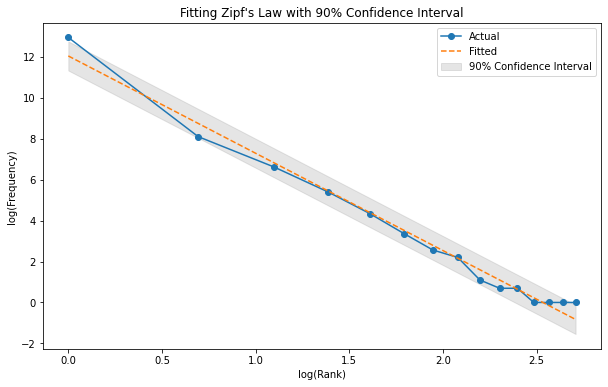

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(log_rank2, log_frequency2, label="Actual", marker='o')
plt.plot(log_rank2, predictions2, label="Fitted", linestyle='--')
plt.fill_between(log_rank2, lower_bound2, upper_bound2, color='gray', alpha=0.2, label='90% Confidence Interval')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title("Fitting Zipf's Law with 90% Confidence Interval")
plt.legend()
plt.show()

In [39]:
#calculating R-squared and adjusted R-squared
n2 = len(log_frequency2)
p2 = 1

r2_2 = r2_score(log_frequency2, predictions2)
adjusted_r2_2 = 1 - (1 - r2_2) * (n2 - 1) / (n2 - p2 - 1)

print(f'R-squared: {r2_2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2_2:.4f}')

R-squared: 0.9858
Adjusted R-squared: 0.9847


In [40]:
#creating 30 bins and assigning each document's token count to them
bins3 = np.linspace(min_tokens, max_tokens, num=31, dtype=int)
docs_df['token_bins3'] = pd.cut(docs_df['token_count'], bins=bins3)
#counting number or documents in each bin and calculating the centers of bins
bin_counts3 = docs_df['token_bins3'].value_counts(sort=False)
bin_centers3 = [(bin_.left + bin_.right) / 2 for bin_ in bin_counts3.index]

In [41]:
#ranking bins based on frequency
ranked_frequencies3 = np.sort(bin_counts3.values)[::-1]
ranks3 = np.arange(1, len(ranked_frequencies3) + 1)
rank3 = np.arange(1, len(bin_counts3) + 1)
frequency3 = np.sort(bin_counts3.values)[::-1]

In [42]:
non_zero_indices3 = frequency3 > 0
#taking the logarithm of the ranks and frequencies
log_rank3 = np.log(rank3[non_zero_indices3])
log_frequency3 = np.log(frequency3[non_zero_indices3])
print(log_frequency3)

[12.93949287  8.73761304  7.32909374  6.42324696  5.44673737  4.81218436
  4.06044301  3.40119738  2.89037176  2.39789527  1.94591015  1.38629436
  1.09861229  0.69314718  0.          0.          0.          0.
  0.          0.        ]


In [43]:
#fitting linear regression model
model3 = LinearRegression()
model3.fit(log_rank3.reshape(-1, 1), log_frequency3)
predictions3 = model3.predict(log_rank3.reshape(-1, 1))

In [44]:
#calculating residuals and standard deviation of the residuals
residuals3 = log_frequency3 - predictions3
std_dev3 = np.std(residuals3)

In [45]:
#calculating the 90% onfidence level bounds
confidence_level = 1.645 #z-score for 90% confidence interval
upper_bound3 = predictions3 + confidence_level * std_dev3
lower_bound3 = predictions3 - confidence_level * std_dev3

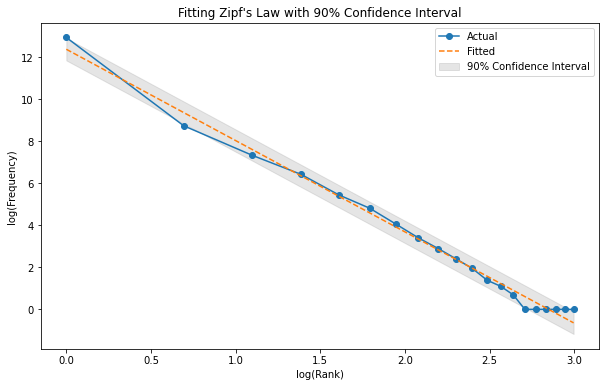

In [46]:
plt.figure(figsize=(10, 6))
plt.plot(log_rank3, log_frequency3, label="Actual", marker='o')
plt.plot(log_rank3, predictions3, label="Fitted", linestyle='--')
plt.fill_between(log_rank3, lower_bound3, upper_bound3, color='gray', alpha=0.2, label='90% Confidence Interval')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title("Fitting Zipf's Law with 90% Confidence Interval")
plt.legend()
plt.show()

In [47]:
#calculating R-squared and adjusted R-squared
n3 = len(log_frequency3)
p3 = 1

r2_3 = r2_score(log_frequency3, predictions3)
adjusted_r2_3 = 1 - (1 - r2_3) * (n3 - 1) / (n3 - p3 - 1)

print(f'R-squared: {r2_3:.4f}')
print(f'Adjusted R-squared: {adjusted_r2_3:.4f}')

R-squared: 0.9913
Adjusted R-squared: 0.9908


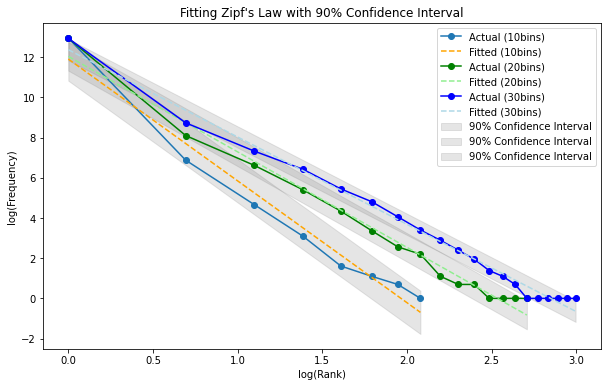

In [48]:
plt.figure(figsize=(10, 6))

plt.plot(log_rank, log_frequency, label="Actual (10bins)", marker='o')
plt.plot(log_rank, predictions, label="Fitted (10bins)", linestyle='--', color='orange')
plt.fill_between(log_rank, lower_bound, upper_bound, color='gray', alpha=0.2, label='90% Confidence Interval')

plt.plot(log_rank2, log_frequency2, label="Actual (20bins)", marker='o', color='green')
plt.plot(log_rank2, predictions2, label="Fitted (20bins)", linestyle='--', color='lightgreen')
plt.fill_between(log_rank2, lower_bound2, upper_bound2, color='gray', alpha=0.2, label='90% Confidence Interval')

plt.plot(log_rank3, log_frequency3, label="Actual (30bins)", marker='o', color='blue')
plt.plot(log_rank3, predictions3, label="Fitted (30bins)", linestyle='--', color='lightblue')
plt.fill_between(log_rank3, lower_bound3, upper_bound3, color='gray', alpha=0.2, label='90% Confidence Interval')

plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title("Fitting Zipf's Law with 90% Confidence Interval")
plt.legend()
plt.show()

### 5.

In [49]:
#getting the min and max linked entity count
min_tokens_le = docs_df['linked_entity_count'].min()
max_tokens_le = docs_df['linked_entity_count'].max()
print(min_tokens_le)
print(max_tokens_le)

0
4142


In [50]:
#creating 10 bins and assigning each document's token count to them
bins_le = np.linspace(min_tokens_le, max_tokens_le, num=11, dtype=int)
docs_df['token_bins_le'] = pd.cut(docs_df['linked_entity_count'], bins=bins_le)
#counting number or documents in each bin and calculating the centers of bins
bin_counts_le = docs_df['token_bins_le'].value_counts(sort=False)
bin_centers_le = [(bin_.left + bin_.right) / 2 for bin_ in bin_counts_le.index]

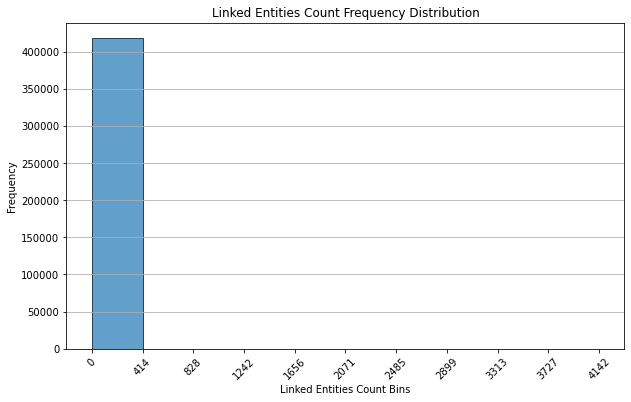

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(bin_centers_le, bin_counts_le, width=np.diff(bins_le), edgecolor='black', alpha=0.7)
plt.xlabel('Linked Entities Count Bins')
plt.ylabel('Frequency')
plt.title('Linked Entities Count Frequency Distribution')
plt.xticks(bins_le, [f'{int(b)}' for b in bins_le], rotation=45)
plt.grid(axis='y')
plt.show()

In [52]:
#ranking bins based on frequency
ranked_frequencies_le = np.sort(bin_counts_le.values)[::-1]
ranks_le = np.arange(1, len(ranked_frequencies_le) + 1)
rank_le = np.arange(1, len(bin_counts_le) + 1)
frequency_le = np.sort(bin_counts_le.values)[::-1]

In [53]:
non_zero_indices_le = frequency_le > 0
#taking the logarithm of the ranks and frequencies
log_rank_le = np.log(rank_le[non_zero_indices_le])
log_frequency_le = np.log(frequency_le[non_zero_indices_le])

In [54]:
#fitting linear regression model
model_le = LinearRegression()
model_le.fit(log_rank_le.reshape(-1, 1), log_frequency_le)
predictions_le = model_le.predict(log_rank_le.reshape(-1, 1))

In [55]:
#calculating residuals and standard deviation of the residuals
residuals_le = log_frequency_le - predictions_le
std_dev_le = np.std(residuals_le)

In [56]:
#calculating the 90% onfidence level bounds
confidence_level = 1.645 #z-score for 90% confidence interval
upper_bound_le = predictions_le + confidence_level * std_dev_le
lower_bound_le = predictions_le - confidence_level * std_dev_le

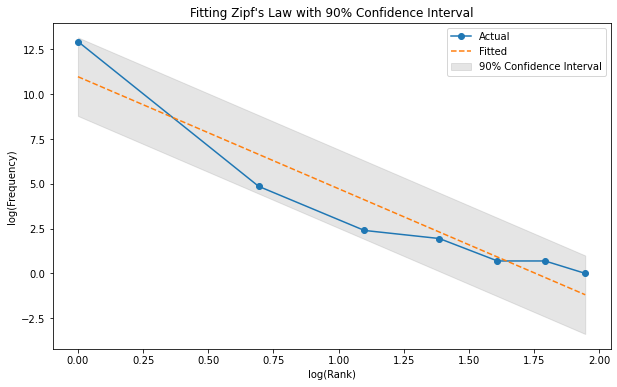

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(log_rank_le, log_frequency_le, label="Actual", marker='o')
plt.plot(log_rank_le, predictions_le, label="Fitted", linestyle='--')
plt.fill_between(log_rank_le, lower_bound_le, upper_bound_le, color='gray', alpha=0.2, label='90% Confidence Interval')
plt.xlabel('log(Rank)')
plt.ylabel('log(Frequency)')
plt.title("Fitting Zipf's Law with 90% Confidence Interval")
plt.legend()
plt.show()

In [58]:
#calculating R-squared and adjusted R-squared
n_6 = len(log_frequency_le)
p_6 = 1

r_6 = r2_score(log_frequency_le, predictions_le)
adjusted_r_6 = 1 - (1 - r_6) * (n_6 - 1) / (n_6 - p_6 - 1)

print(f'R-squared: {r_6:.4f}')
print(f'Adjusted R-squared: {adjusted_r_6:.4f}')

R-squared: 0.8987
Adjusted R-squared: 0.8784


### 6.

In [59]:
cumulative_tokens = 0
cumulative_entities = 0
cumulative_token_counts = []
cumulative_entity_counts = []

In [60]:
#iterate through the linked entity and token counts for each document
for entities in docs_df['linked_entity_count']:
    cumulative_entities += entities
    cumulative_entity_counts.append(cumulative_entities)
print(cumulative_entities)

for tokens in docs_df['token_count']:
    cumulative_tokens += tokens
    cumulative_token_counts.append(cumulative_tokens)
print(cumulative_tokens)

5834463
83333647


In [61]:
I = np.array(cumulative_token_counts)
C = np.array(cumulative_entity_counts)
print(I)

[    1236     2115     2488 ... 83332933 83333368 83333647]


In [62]:
#taking the logarithm of the counts
log_I = np.log(I)
log_C = np.log(C)

In [63]:
#fitting linear regression model to the log-tranformed data
lin_reg = LinearRegression()
lin_reg.fit(log_I.reshape(-1, 1), log_C)
beta = lin_reg.coef_[0]
log_K = lin_reg.intercept_
K = np.exp(log_K) 

In [64]:
#using the fitted model to predict linked entity count based on token count
C_pred = K * I ** beta
#calculating R-squared and adjusted R-squared
r2 = r2_score(C, C_pred)
n = len(C)
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - 2)
print(f"Estimated parameters: K = {K}, beta = {beta}")
print(f"R-squared: {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

Estimated parameters: K = 0.011294452857075128, beta = 1.101455708206811
R-squared: 0.9996761481723251
Adjusted R-squared: 0.9996761474112233


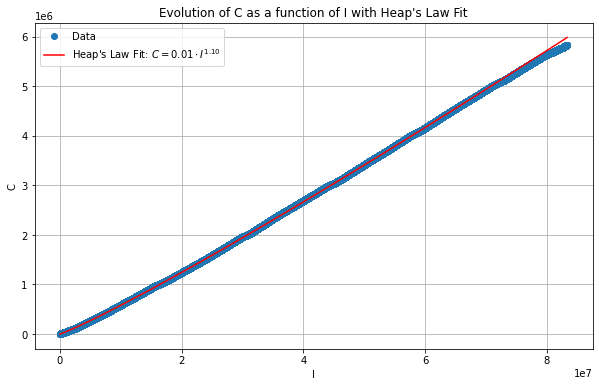

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(I, C, 'o', label='Data')
plt.plot(I, C_pred, 'r-', label=f"Heap's Law Fit: $C = {K:.2f} \cdot I^{{{beta:.2f}}}$")
plt.xlabel('I')
plt.ylabel('C')
plt.title("Evolution of C as a function of I with Heap's Law Fit")
plt.legend()
plt.grid(True)
plt.show()

### 7.

In [31]:
import spacy
from collections import Counter

In [69]:
#tokens = docs_df['tokens']

In [70]:
#finding linked entities in each document, placing in new column
docs_df['linked_entities'] = docs_df['tokens'].apply(lambda tokens: [token for token in tokens if token in titles_set])

# Displaying the dataframe with the new column 'linked_entities'
docs_df[['id', 'title', 'tokens', 'linked_entities']]

,id,title,tokens,linked_entities
0,1,Amsterdam,"[Amsterdam, Amsterdam, on, Alankomaiden, pääka...","[Amsterdam, Amsterdam, Amsterdam, 2006, 000, A..."
1,2,Aikido,"[Aikido, Aikido, (, suom., harmonian, tie, ), ...","[Aikido, Aikido, 1999, Sana, Aikido, Aikido, H..."
2,4,Algebrallinen luku,"[Algebrallinen, luku, Algebrallinen, luku, tar...","[Jos, Jos, Kaikki]"
3,5,Alkuluku,"[Alkuluku, Alkuluku, on, lukua, 1, suurempi, l...","[Alkuluku, Alkuluku, P, Pierre, 0, Eukleides, ..."
4,6,Au,"[Au, Au, tarkoittaa, seuraavia, :]","[Au, Au]"
...,...,...,...,...
425501,61291,Koraali,"[Koraali, Koraali, on, luterilaisessa, kirkoss...","[Koraali, Koraali, Martti, Luther, Jumala, Seb..."
425502,61292,Räjähtävä lammas,"[Räjähtävä, lammas, Räjähtävä, lammas, on, pop...","[Peter, Bad, Taste, 1987, Indian, Kenties, Ton..."
425503,61293,Valens,"[Valens, Flavius, Julius, Valens, (, 328, –, 9...","[Valens, Flavius, Julius, Valens, Valentinianu..."
425504,61298,Flipperi,"[Flipperi, Flipperi, on, elektroninen, peli, ,...","[Flipperi, Flipperi, Itse, Ensimmäinen, Ball, ..."


In [71]:
#2000 doc sample
sampled_docs_df = docs_df.sample(n=2000, random_state=42) 

sampled_docs_df.head()

,id,url,title,tokens,linked_entity_count,token_count,token_bins,token_bins2,token_bins3,token_bins_le,linked_entities
202292,744016,https://fi.wikipedia.org/wiki?curid=744016,Frantsilan Luomuyrttitila,"[Frantsilan, Luomuyrttitila, Frantsilan, Luomu...",11,161,"(1, 3287]","(1, 1644]","(1, 1096]","(0, 414]","[Ky, Virpi, Jim, Se, Tila, 2004, Yritys, Yrity..."
301084,1075653,https://fi.wikipedia.org/wiki?curid=1075653,Miss Jean Brodien parhaat vuodet,"[Miss, Jean, Brodien, parhaat, vuodet, Miss, J...",56,505,"(1, 3287]","(1, 1644]","(1, 1096]","(0, 414]","[Miss, Jean, Miss, Jean, Ronald, Jean, Smith, ..."
337623,1184764,https://fi.wikipedia.org/wiki?curid=1184764,Elina Tervo,"[Elina, Tervo, Elina, Tervo, on, suomalainen, ...",36,187,"(1, 3287]","(1, 1644]","(1, 1096]","(0, 414]","[Elina, Tervo, Elina, Tervo, Elina, Tervo, Fit..."
103420,389878,https://fi.wikipedia.org/wiki?curid=389878,Minyadit,"[Minyadit, Minyadit, olivat, kreikkalaisessa, ...",14,257,"(1, 3287]","(1, 1644]","(1, 1096]","(0, 414]","[Minyadit, Minyadit, Arsinoe, Leukippe, Minyad..."
4161,64264,https://fi.wikipedia.org/wiki?curid=64264,Harpo Marx,"[Harpo, Marx, Harpo, Marx, (, oik., Adolph, Ar...",152,1566,"(1, 3287]","(1, 1644]","(1096, 2191]","(0, 414]","[Harpo, Marx, Harpo, Marx, Arthur, Marx, New, ..."


In [72]:
#function to count location assosciated and person/organisation associated linked entities
def count_linked_entities(linked_entities_list):
    loc_count = 0
    org_count = 0

    entities_string = ' '.join(linked_entities_list)
    spacy_doc = nlp(entities_string)
    
    loc_set = set()
    org_set = set()

    for ent in spacy_doc.ents:
        if ent.label_ == 'LOC':
            loc_set.add(ent.text)
        elif ent.label_ in ['PERSON', 'ORG']:
            org_set.add(ent.text)

    loc_count = len(loc_set)
    org_count = len(org_set)

    return loc_count, org_count

In [73]:
#adding the counted location and person/organisation counts to the dataframe
sampled_docs_df[['location_count', 'person_org_count']] = sampled_docs_df['linked_entities'].apply(count_linked_entities).apply(pd.Series)

print(sampled_docs_df[['id', 'title', 'location_count', 'person_org_count']])

             id                             title  location_count  \
202292   744016         Frantsilan Luomuyrttitila               0   
301084  1075653  Miss Jean Brodien parhaat vuodet               0   
337623  1184764                       Elina Tervo               0   
103420   389878                          Minyadit               0   
4161      64264                        Harpo Marx               0   
...         ...                               ...             ...   
301762  1077625                 Å (täsmennyssivu)               0   
116253   434830      Laulu tulipunaisesta kukasta               0   
386926  1339776                   Espoo-kvartetti               0   
274635  1006597                          Boboševo               0   
15398     95819           Johannes Vilhelm Jensen               0   

        person_org_count  
202292                 2  
301084                 7  
337623                 6  
103420                 4  
4161                  26  
...      

### 8.

In [223]:
cumulative_L = 0
cumulative_L_counts = []

'cumulative_le = 0\ncumulative_le_counts = []'

In [224]:
#iterating through the location counts for each document
for L in sampled_docs_df['location_count']:
    cumulative_L += L
    cumulative_L_counts.append(cumulative_L)
print(cumulative_L)
#creating dataframe for page numbers and cumulative location counts
cumulative_L_df = pd.DataFrame({
    'page': range(1, len(cumulative_L_counts) + 1),
    'cumulative_L': cumulative_L_counts
})

41


In [225]:
pages = cumulative_L_df['page'].values
L = cumulative_L_df['cumulative_L'].values
#calculating cumulative sums of pages and location counts
cumulative_L_df['cumulative_pages'] = cumulative_L_df['page'].cumsum()
cumulative_L_df['cumulative_L'] = cumulative_L_df['cumulative_L'].cumsum()

print(cumulative_L_df[['page', 'cumulative_pages', 'cumulative_L']])

      page  cumulative_pages  cumulative_L
0        1                 1             0
1        2                 3             0
2        3                 6             0
3        4                10             0
4        5                15             0
...    ...               ...           ...
1995  1996           1993006         44492
1996  1997           1995003         44533
1997  1998           1997001         44574
1998  1999           1999000         44615
1999  2000           2001000         44656

[2000 rows x 3 columns]


In [230]:
#preparing variables for Heap's law model fitting
cumulative_pages = cumulative_L_df['page'].values
cumulative_L = cumulative_L_df['cumulative_L'].values
print(cumulative_L)
small_constant = 1e-10 #adding small constant to avoid issues with log(0)
#taking the logarithm of the page and location counts
log_pages = np.log(cumulative_pages + small_constant)
log_L = np.log(cumulative_L + small_constant)

[    0     0     0 ... 44574 44615 44656]


In [231]:
#fitting linear regression model to the log-tranformed data
lin_reg = LinearRegression()
lin_reg.fit(log_pages.reshape(-1, 1), log_L)
beta = lin_reg.coef_[0]
log_K = lin_reg.intercept_
K = np.exp(log_K)

In [232]:
#using the fitted model to predict location count based on pages count
L_pred = K * (cumulative_pages + small_constant) ** beta

-1.3159849487182531


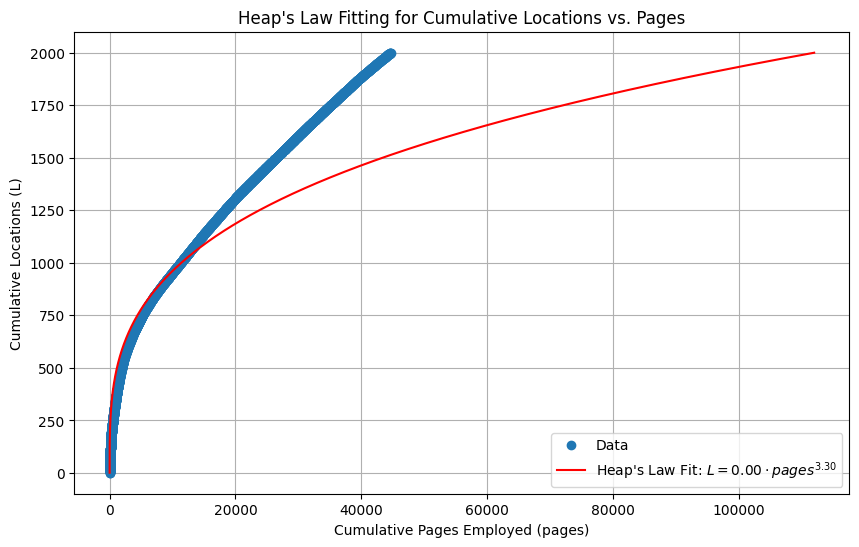

In [233]:
plt.figure(figsize=(10, 6))
plt.plot(cumulative_L, cumulative_pages, 'o', label='Data')
plt.plot(L_pred, pages, 'r-', label=f"Heap's Law Fit: $L = {K:.2f} \cdot pages^{{{beta:.2f}}}$")
plt.xlabel('Cumulative Pages Employed (pages)')
plt.ylabel('Cumulative Locations (L)')
plt.title("Heap's Law Fitting for Cumulative Locations vs. Pages")
plt.legend()
plt.grid(True)
plt.show()

### 9.

In [205]:
cumulative_P = 0
cumulative_P_counts = []

In [206]:
#iterating through the person/organisation counts for each document
for P in sampled_docs_df['person_org_count']:
    cumulative_P += P
    cumulative_P_counts.append(cumulative_P)
print(cumulative_P)
#creating dataframe for page numbers and cumulative person/organisation counts
cumulative_P_df = pd.DataFrame({
    'page': range(1, len(cumulative_P_counts) + 1),
    'cumulative_P': cumulative_P_counts
})

3928


In [ ]:
#calculating cumulative sums of pages and person/organisation counts
cumulative_P_df['cumulative_pages'] = cumulative_P_df['page'].cumsum()
cumulative_P_df['cumulative_P'] = cumulative_P_df['cumulative_P'].cumsum()

In [208]:
#preparing variables for Heap's law model fitting
pages = cumulative_P_df['page'].values
P = cumulative_P_df['cumulative_P'].values

In [209]:
small_constant = 1e-10 #adding small constant to avoid issues with log(0)
#taking the logarithm of the page and location counts
log_pages = np.log(pages + small_constant)
log_P = np.log(P + small_constant)

In [210]:
#fitting linear regression model to the log-tranformed data
lin_reg = LinearRegression()
lin_reg.fit(log_pages.reshape(-1, 1), log_P)
beta = lin_reg.coef_[0]
log_K = lin_reg.intercept_
K = np.exp(log_K)

In [211]:
#using the fitted model to predict person/organisation count based on pages count
P_pred = K * (pages + small_constant) ** beta
r2_P = r2_score(P, P_pred)

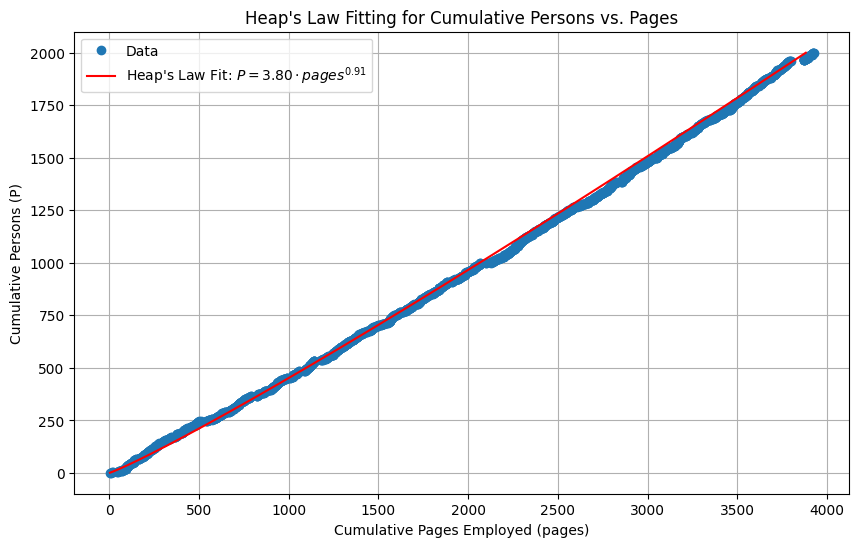

In [213]:
plt.figure(figsize=(10, 6))
plt.plot(P, pages, 'o', label='Data')
plt.plot(P_pred, pages, 'r-', label=f"Heap's Law Fit: $P = {K:.2f} \cdot pages^{{{beta:.2f}}}$")
plt.xlabel('Cumulative Pages Employed (pages)')
plt.ylabel('Cumulative Persons (P)')
plt.title("Heap's Law Fitting for Cumulative Persons vs. Pages")
plt.legend()
plt.grid(True)
plt.show()